# **Projek Akhir Analisis Data**
**Nama**  : Azhar Fikri H.

**Email**   :  afharyodwiseno@gmail.com

**ID Dicoding** : afharyo

# Menentukan Pertanyaan Bisnis Atau Analisis

* 1. Kota manakah dengan total pembelian terbesar di platform Olist pada tahun 2018 ?
* 2. bagaimana tren aktivitas pembelian barang pada tahun 2017 dari bulan ke bulan ?




## Import Semua Packages/Library yang Digunakan

import library yang akan membantu dalam mengelola data

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

## Data Wrangling




### Gathering Data

Mengumpulkan dataset yang akan digunakan

In [76]:
customers = pd.read_csv("./data/olist_customers_dataset.csv") # customer dataset
orders = pd.read_csv("./data/olist_orders_dataset.csv") # orders dataset
orders_payments = pd.read_csv("./data/olist_order_payments_dataset.csv") # order_payments dataset


Cek dataset customers

In [77]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Cek dataset orders

In [78]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,delivered,10/3/2016 22:31,10/4/2016 10:19,10/8/2016 10:34,10/14/2016 16:08,11/23/2016 0:00
1,36989eb07a0de2d3d3129eea35553875,aadd27185177fc7ac9b364898ac09343,delivered,10/4/2016 13:11,10/4/2016 13:46,10/8/2016 13:46,10/11/2016 13:46,12/6/2016 0:00
2,7033745709b7cf1bac7d2533663592de,7f0ca17bb33b230b47459437cf0682c7,delivered,10/4/2016 14:13,10/4/2016 14:46,10/8/2016 14:46,10/11/2016 14:46,11/30/2016 0:00
3,fbbc9a4fa88f1ccd651790df665b3e57,eba930c3950c6964961c7c72f7f6a461,delivered,10/4/2016 13:30,10/5/2016 2:45,10/9/2016 2:45,10/28/2016 17:05,12/2/2016 0:00
4,bcbc0973414b1dd97555e6f8e9713cfa,3f6f000d5b0a959f38481fad4ab7cac2,delivered,10/4/2016 23:59,10/5/2016 3:45,10/9/2016 3:45,10/16/2016 10:41,11/28/2016 0:00


Cek dataset order payments

In [79]:
orders_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08
1,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88
2,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31
3,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21
4,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66


Menggabungkan dataset

In [80]:
df_merge = pd.merge(customers, orders, on='customer_id', how='right')
df_merge = pd.merge(df_merge, orders_payments, on='order_id', how='inner')


check dataset df_merge

In [81]:
df_merge.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,7812fcebfc5e8065d31e1bb5f0017dae,87776adb449c551e74c13fc34f036105,12030,taubate,SP,cd3b8574c82b42fc8129f6d502690c3e,delivered,10/3/2016 22:31,10/4/2016 10:19,10/8/2016 10:34,10/14/2016 16:08,11/23/2016 0:00,1,credit_card,4,40.95
1,aadd27185177fc7ac9b364898ac09343,f176923a0a4ab546c7287791ccb82193,78075,cuiaba,MT,36989eb07a0de2d3d3129eea35553875,delivered,10/4/2016 13:11,10/4/2016 13:46,10/8/2016 13:46,10/11/2016 13:46,12/6/2016 0:00,1,credit_card,10,101.44
2,7f0ca17bb33b230b47459437cf0682c7,1dc848c11c2985635c268ff3dea707eb,21853,rio de janeiro,RJ,7033745709b7cf1bac7d2533663592de,delivered,10/4/2016 14:13,10/4/2016 14:46,10/8/2016 14:46,10/11/2016 14:46,11/30/2016 0:00,1,credit_card,4,111.51
3,eba930c3950c6964961c7c72f7f6a461,30a38716bb2d04f12bb813aa2f926270,29300,cachoeiro de itapemirim,ES,fbbc9a4fa88f1ccd651790df665b3e57,delivered,10/4/2016 13:30,10/5/2016 2:45,10/9/2016 2:45,10/28/2016 17:05,12/2/2016 0:00,1,boleto,1,119.43
4,3f6f000d5b0a959f38481fad4ab7cac2,221234182f828fb9f2a4ba9c89874ede,87820,cidade gaucha,PR,bcbc0973414b1dd97555e6f8e9713cfa,delivered,10/4/2016 23:59,10/5/2016 3:45,10/9/2016 3:45,10/16/2016 10:41,11/28/2016 0:00,1,credit_card,3,383.24


### Assessing Data

#### Missing Value

In [82]:
print("Jumlah nilai kosong pada dataset \"df_merge\"")
df_merge.isnull().sum()

Jumlah nilai kosong pada dataset "df_merge"


customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
dtype: int64

Supaya hasil pengolahan data valid, data tanggal yang kosong akan dihapus

#### Duplicate Value

In [83]:
print("Jumlah nilai ganda pada dataset \"df_merge\"")
df_merge.duplicated().sum()

Jumlah nilai ganda pada dataset "df_merge"


0

**Insight**

*   Ada banyak data kosong dalam beberapa variable. Sehingga, data tersebut perlu dihapus agar hasil olahan data dikatakan valid
* Tidak ditemukan data duplicate



### Cleaning Data

Membersihkan nilai kosong pada variable tanggal pada dataset orders

In [84]:
df_merge.dropna(axis=0, inplace=True)

In [85]:
df_merge.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64

Membuang variable yang tidak dibutuhkan dalam dataframe

In [86]:
df_merge = df_merge.drop(['customer_id','customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'order_id', 'order_estimated_delivery_date'], axis=1)

Cek df_merge setelah beberapa variable dibuang

In [87]:
df_merge.head()

,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,payment_sequential,payment_type,payment_installments,payment_value
0,SP,delivered,10/3/2016 22:31,10/4/2016 10:19,10/8/2016 10:34,10/14/2016 16:08,1,credit_card,4,40.95
1,MT,delivered,10/4/2016 13:11,10/4/2016 13:46,10/8/2016 13:46,10/11/2016 13:46,1,credit_card,10,101.44
2,RJ,delivered,10/4/2016 14:13,10/4/2016 14:46,10/8/2016 14:46,10/11/2016 14:46,1,credit_card,4,111.51
3,ES,delivered,10/4/2016 13:30,10/5/2016 2:45,10/9/2016 2:45,10/28/2016 17:05,1,boleto,1,119.43
4,PR,delivered,10/4/2016 23:59,10/5/2016 3:45,10/9/2016 3:45,10/16/2016 10:41,1,credit_card,3,383.24


Menghilangkan format waktu pada setiap variable dengan nilai tanggal

In [88]:
df_merge["order_purchase_timestamp"] = pd.to_datetime(df_merge["order_purchase_timestamp"]).dt.date
df_merge["order_approved_at"] = pd.to_datetime(df_merge["order_approved_at"]).dt.date
df_merge["order_delivered_carrier_date"] = pd.to_datetime(df_merge["order_delivered_carrier_date"]).dt.date
df_merge["order_delivered_customer_date"] = pd.to_datetime(df_merge["order_delivered_customer_date"]).dt.date


Cek perubahan format tanggal

In [89]:
df_merge.head()

,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,payment_sequential,payment_type,payment_installments,payment_value
0,SP,delivered,2016-10-03,2016-10-04,2016-10-08,2016-10-14,1,credit_card,4,40.95
1,MT,delivered,2016-10-04,2016-10-04,2016-10-08,2016-10-11,1,credit_card,10,101.44
2,RJ,delivered,2016-10-04,2016-10-04,2016-10-08,2016-10-11,1,credit_card,4,111.51
3,ES,delivered,2016-10-04,2016-10-05,2016-10-09,2016-10-28,1,boleto,1,119.43
4,PR,delivered,2016-10-04,2016-10-05,2016-10-09,2016-10-16,1,credit_card,3,383.24


Membuat column baru berupa lama pengiriman

In [90]:
df_merge['order_delivered_customer_date'] = pd.to_datetime(df_merge['order_delivered_customer_date'])
df_merge['order_delivered_carrier_date'] = pd.to_datetime(df_merge['order_delivered_carrier_date'])

df_merge['lama_pengiriman'] = (df_merge['order_delivered_customer_date'] - df_merge['order_delivered_carrier_date']).dt.days
df_merge = df_merge[df_merge['lama_pengiriman'] >= 0] # Buang nilai total lama pengiriman yang kurang dari nol

Cek variable baru pada df_merge

In [91]:
df_merge.sample(10)

,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,payment_sequential,payment_type,payment_installments,payment_value,lama_pengiriman
101518,SP,delivered,2018-08-24,2018-08-24,2018-08-24,2018-08-27,1,credit_card,1,38.96,3
55410,MG,delivered,2018-02-05,2018-02-05,2018-02-09,2018-02-28,1,credit_card,6,64.80,19
39565,SP,delivered,2017-11-26,2017-11-26,2017-11-30,2017-12-05,1,credit_card,1,94.40,5
26837,SP,delivered,2017-09-20,2017-09-20,2017-09-21,2017-09-22,1,credit_card,8,101.06,1
36470,TO,delivered,2017-11-22,2017-11-22,2017-11-23,2017-12-04,1,credit_card,7,72.37,11
38019,SC,delivered,2017-11-28,2017-11-28,2017-11-28,2017-12-11,1,credit_card,5,113.13,13
96477,SP,delivered,2018-08-04,2018-08-04,2018-08-07,2018-08-13,1,credit_card,8,84.36,6
14621,RS,delivered,2017-06-24,2017-06-24,2017-06-27,2017-07-08,1,credit_card,3,51.59,11
88952,SP,delivered,2018-07-02,2018-07-02,2018-07-03,2018-07-04,1,credit_card,10,355.78,1
18899,SP,delivered,2017-07-28,2017-07-28,2017-07-31,2017-08-04,1,credit_card,9,223.26,4


## Exploratory Data Analysis


In [92]:
df_merge.info()
df_merge.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 100716 entries, 0 to 101997
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_state                 100716 non-null  object        
 1   order_status                   100716 non-null  object        
 2   order_purchase_timestamp       100716 non-null  object        
 3   order_approved_at              100716 non-null  object        
 4   order_delivered_carrier_date   100716 non-null  datetime64[ns]
 5   order_delivered_customer_date  100716 non-null  datetime64[ns]
 6   payment_sequential             100716 non-null  int64         
 7   payment_type                   100716 non-null  object        
 8   payment_installments           100716 non-null  int64         
 9   payment_value                  100716 non-null  float64       
 10  lama_pengiriman                100716 non-null  int64         
dtypes: da

,order_delivered_carrier_date,order_delivered_customer_date,payment_sequential,payment_installments,payment_value,lama_pengiriman
count,100716,100716,100716.000000,100716.000000,100716.000000,100716.000000
mean,2018-01-03 05:40:11.867032064,2018-01-12 12:49:53.923507712,1.088347,2.851662,153.059853,9.298403
min,2016-10-08 00:00:00,2016-10-11 00:00:00,1.000000,0.000000,0.000000,0.000000
25%,2017-09-14 00:00:00,2017-09-22 00:00:00,1.000000,1.000000,56.780000,4.000000
50%,2018-01-23 00:00:00,2018-02-01 00:00:00,1.000000,1.000000,100.000000,7.000000
75%,2018-05-08 00:00:00,2018-05-15 00:00:00,1.000000,4.000000,171.270000,12.000000
max,2018-09-11 00:00:00,2018-10-17 00:00:00,26.000000,24.000000,13664.080000,205.000000
std,NaN,NaN,0.652757,2.684332,214.485316,8.780258


#### Pengaruh lama pengiriman terhadap total pembelian

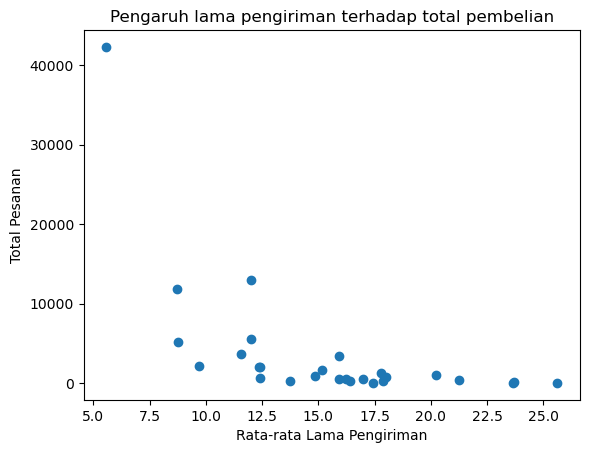

In [93]:

total_pesanan = df_merge['customer_state'].value_counts().reset_index()

total_pesanan.columns = ['customer_state', 'total_pesanan']

mean_delivery_time =df_merge.groupby(by='customer_state').agg(
    avg_delivery_time=('lama_pengiriman', 'mean')
).reset_index()

df3 = total_pesanan.merge(mean_delivery_time, how='inner', on='customer_state')
df3

plt.scatter(df3['avg_delivery_time'], df3['total_pesanan'])
plt.xlabel('Rata-rata Lama Pengiriman')
plt.ylabel('Total Pesanan')
plt.title('Pengaruh lama pengiriman terhadap total pembelian')
plt.show()

#### Sebaran Pembelian per Kota tiap Bulan

In [94]:
df_merge.groupby(by='customer_state').agg(
    avg_payment=('payment_value', 'mean'),
    max_payment=('payment_value', 'max'),
).reset_index().describe()

,avg_payment,max_payment
count,27.000000,27.000000
mean,190.658296,3708.655926
std,31.095520,2624.137972
min,136.366312,994.770000
25%,162.050322,2129.865000
50%,197.119961,3126.500000
75%,212.503726,3917.665000
max,250.153630,13664.080000


#### Mencari hubungan antara customer_state dengan lama_pengiriman

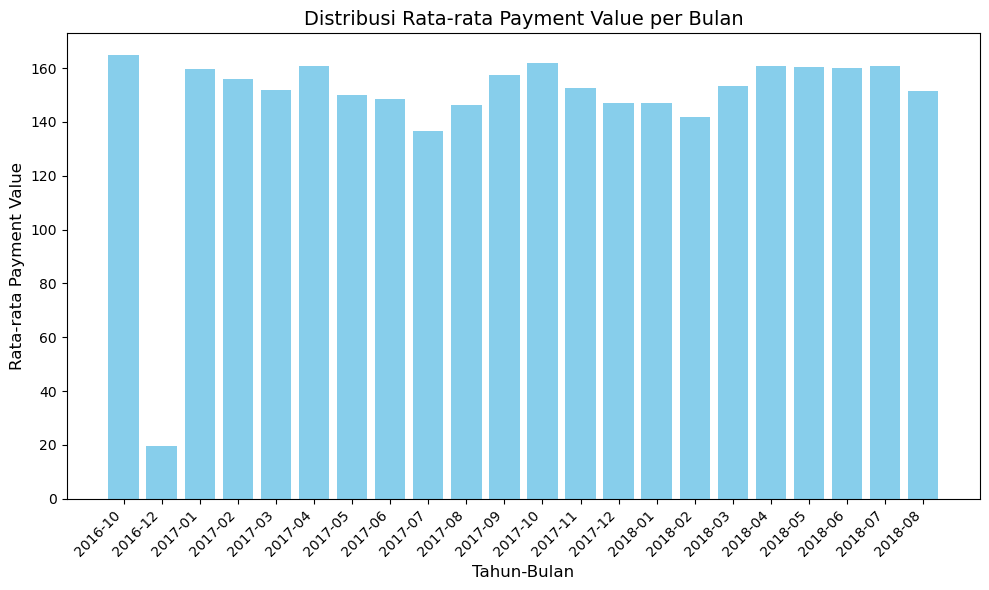

In [95]:
df_merge['order_approved_at'] = pd.to_datetime(df_merge['order_approved_at'])

# membuat kolom year_month
df_merge['year_month'] = df_merge['order_approved_at'].dt.to_period('M')

# Group by year-month dan hitung rata rata payment value
monthly_payment = df_merge.groupby('year_month')['payment_value'].mean().reset_index()

# ubah year_month menjadi string untuk plotting
monthly_payment['year_month_str'] = monthly_payment['year_month'].astype(str)

# urutkan berdasarkan year_month
monthly_payment = monthly_payment.sort_values('year_month')

# Plot bar chart menggunakan Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(monthly_payment['year_month_str'], monthly_payment['payment_value'], color='skyblue')

# Menambahkan judul dan label sumbu
plt.title('Distribusi Rata-rata Payment Value per Bulan', fontsize=14)
plt.xlabel('Tahun-Bulan', fontsize=12)
plt.ylabel('Rata-rata Payment Value', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Menampilkan plot
plt.tight_layout()
plt.show()

Insight :
* Pembayaran rata-rata yang lebih tinggi cenderung terjadi pada bulan-bulan terakhir tahun ini (Oktober hingga Desember), mungkin karena belanja liburan.
* Pembayaran rata-rata yang lebih rendah lebih umum terjadi pada bulan-bulan awal tahun (Januari hingga Maret), yang mungkin mencerminkan pengurangan pengeluaran pasca-liburan
* Pola tersebut tampaknya agak berulang antara tahun 2017 dan 2018, yang menunjukkan tren musiman yang konsisten
* Kota dengan pengiriman cepat cenderung memiliki lebih banyak pesanan.
* Kota dengan waktu pengiriman yang lebih lama, terutama di atas 20 hari, cenderung memiliki pesanan yang lebih sedikit.
* Ada satu kota yang menjadi outlier, dengan pengiriman cepat dan pesanan sangat tinggi, yang dapat menjadi daerah dengan kinerja logistik terbaik.
* diketahui bahwa jumlah pembelian yang tersebar dalam kota kota terjadi secara merata

## Export Clean Dataset to CSV

In [96]:
#df_merge.to_csv('/content/drive/My Drive/all_data.csv', index=False)

## Visualisasi Data

### Pertanyaan 1: Kota manakah dengan total pembelian terbesar di platform Olist pada tahun 2018 ?

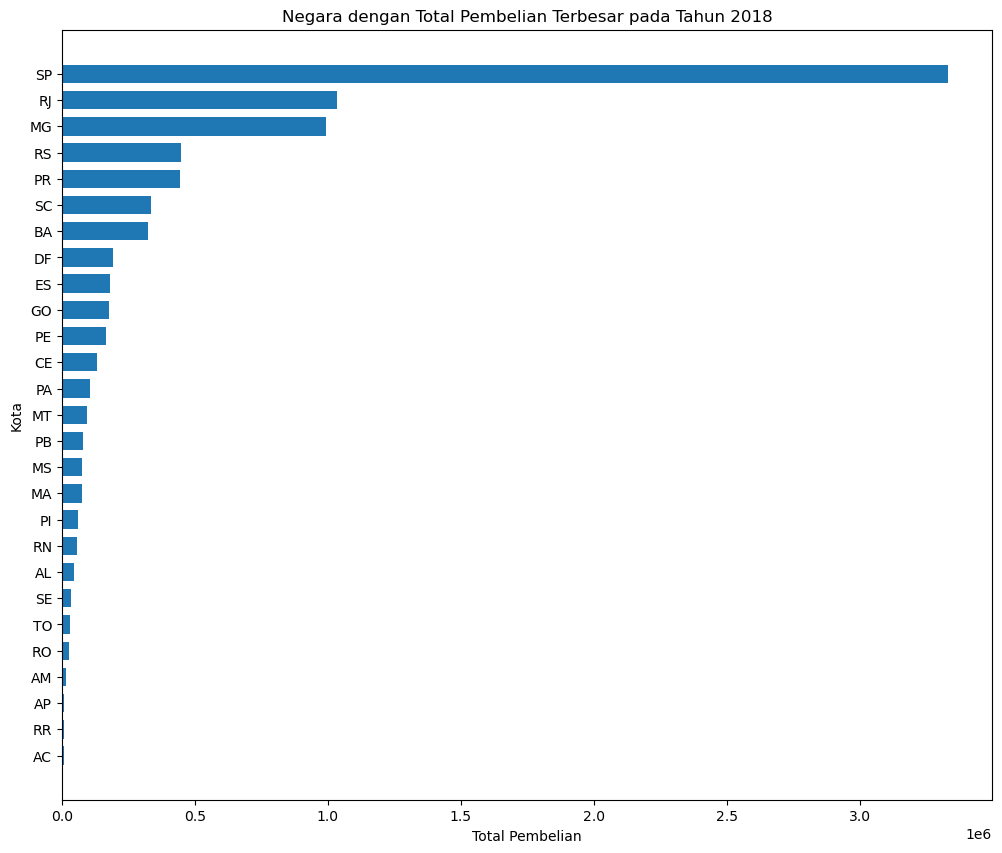

In [97]:
df_merge['order_approved_at'] = pd.to_datetime(df_merge['order_approved_at'])

df1 = df_merge[df_merge['order_approved_at'].dt.year == 2018]
df1 = df1.groupby(['customer_state'])['payment_value'].agg('sum')
df1 = df1.sort_values(ascending=True)

x = []
y = []

for state, count in df1.items():
  x.append(state)
  y.append(count)



plt.figure(figsize=(12, 10))


plt.barh(x, y, height=0.7)
plt.xlabel("Total Pembelian")
plt.ylabel("Kota")
plt.title("Negara dengan Total Pembelian Terbesar pada Tahun 2018")
plt.show()

### Pertanyaan 2: Bagaimana tren aktivitas pembelian barang pada tahun 2017 dari bulan ke bulan ?


C:\Users\DELL\AppData\Local\Temp\ipykernel_20980\4113672944.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2_monthly = df2.resample('M', on='order_approved_at').size()


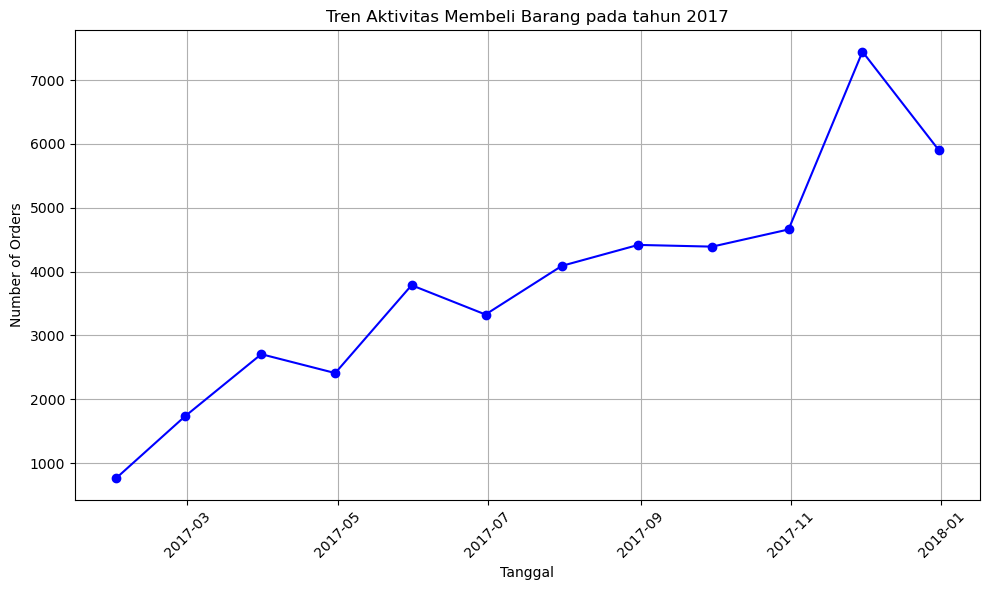

In [98]:
df_merge['order_approved_at'] = pd.to_datetime(df_merge['order_approved_at'])

df2 = df_merge[df_merge['order_approved_at'].dt.year == 2017]
df2_monthly = df2.resample('M', on='order_approved_at').size()

# Plot the data as a line chart
plt.figure(figsize=(10, 6))
plt.plot(df2_monthly.index, df2_monthly.values, marker='o', linestyle='-', color='b')
plt.title("Tren Aktivitas Membeli Barang pada tahun 2017")
plt.xlabel("Tanggal")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insight :
* Menunjukkan peningkatan konsisten sepanjang tahun.
* Puncak aktivitas terjadi menjelang akhir tahun, kemungkinan terkait musim liburan.
* Pola ini dapat dimanfaatkan untuk optimasi inventaris dan strategi pemasaran.
* Sao Paulo (SP) mendominasi total pembelian pada tahun 2018.
* Terdapat kesenjangan signifikan antara SP dan kota-kota lain, menunjukkan potensi ekspansi pasar.
* Kota-kota seperti Acre (AC) dan Roraima (RR) memiliki tingkat pembelian terendah, memerlukan strategi pemasaran khusus.

## Kesimpulan

* Diketahui bahwa waktu lama pengiriman memiliki pengaruh terkait total pengiriman pada tiap kota. Sebagai fakta,  kota Sao Paulo (SP) yang memiliki total pembelian terbesar pada tahun 2018 di platform Olist mempunyai waktu pengiriman tercepat (+- 5 hari). Sebaliknya, diketahui kesenjangan signifikan antara SP dan kota-kota lain mengungkapkan potensi ekspansi pasar ke wilayah-wilayah dengan pembelian rendah, seperti Acre (AC) dan Roraima (RR). Dari hasil analisis data,  maka dapat disarankan untuk mempertahankan dan meningkatkan layanan di Sao Paulo dan menerapkan faktor kesuksesan pada kota lain. Kemudian,  jaringan logistik perlu dioptimalkan, terutama pada  terutama di kota-kota dengan waktu pengiriman yang lebih lambat.

* Berdasarkan hasil analisis data, telah ditemukan pola yaitu adanya puncak aktivitas pembelian di platform Olist pada bulan Liburan (Desember - Januari). Aktivitas pembelian menunjukkan peningkatan konsisten sepanjang tahun 2017, dengan puncak terjadi menjelang akhir tahun, kemungkinan terkait musim liburan. Terlebih lagi, rata-rata jumlah penghasilan dari aktivitas pembelian pelanggan juga mengalami puncak pada bulan Libur. Hal ini dikarenakan pelanggan memiliki waktu yang luang sehingga memiliki kesempatan untuk mencari dan membeli barang. Dari Tren ini dapat dimanfaatkan untuk menerapkan strategi yang optimal pada akhir tahun untuk meningkatkan jumlah aktivitas pembelian pada platform tersebut. Strategi tersebut meliputi memberikan diskon atau promosi pada akhir Tahun sehingga pelanggan lebih tertarik untuk membeli barang dengan harga yang lebih murah. 

## Export CSV

In [99]:
df_merge.to_csv('./data/all_data.csv', index=False)